In [26]:
import h5py
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from skimage import data
import numpyro
import numpyro.distributions as dist
import jax.random as random
import einops
import jax
import jax.numpy as jnp
import SimpleITK as sitk
import numpy as np
import cv2 as cv
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float
from skimage import io
import matplotlib.pyplot as plt
import argparse
import SimpleITK as sitk


dir_example='/workspaces/jax_cpu_experiments_b/explore/spleen_2_image.nii.gz'
imageA=sitk.ReadImage(dir_example)
arr=np.array(sitk.GetArrayFromImage(imageA))
arr= np.rot90(np.rot90(arr[75,:,:])) 
arr=arr-np.min(arr.flatten())
arr=arr/np.max(arr.flatten())
arr= arr[192:-128,206:-66 ]

arr.shape

(192, 240)

<Figure size 640x480 with 0 Axes>

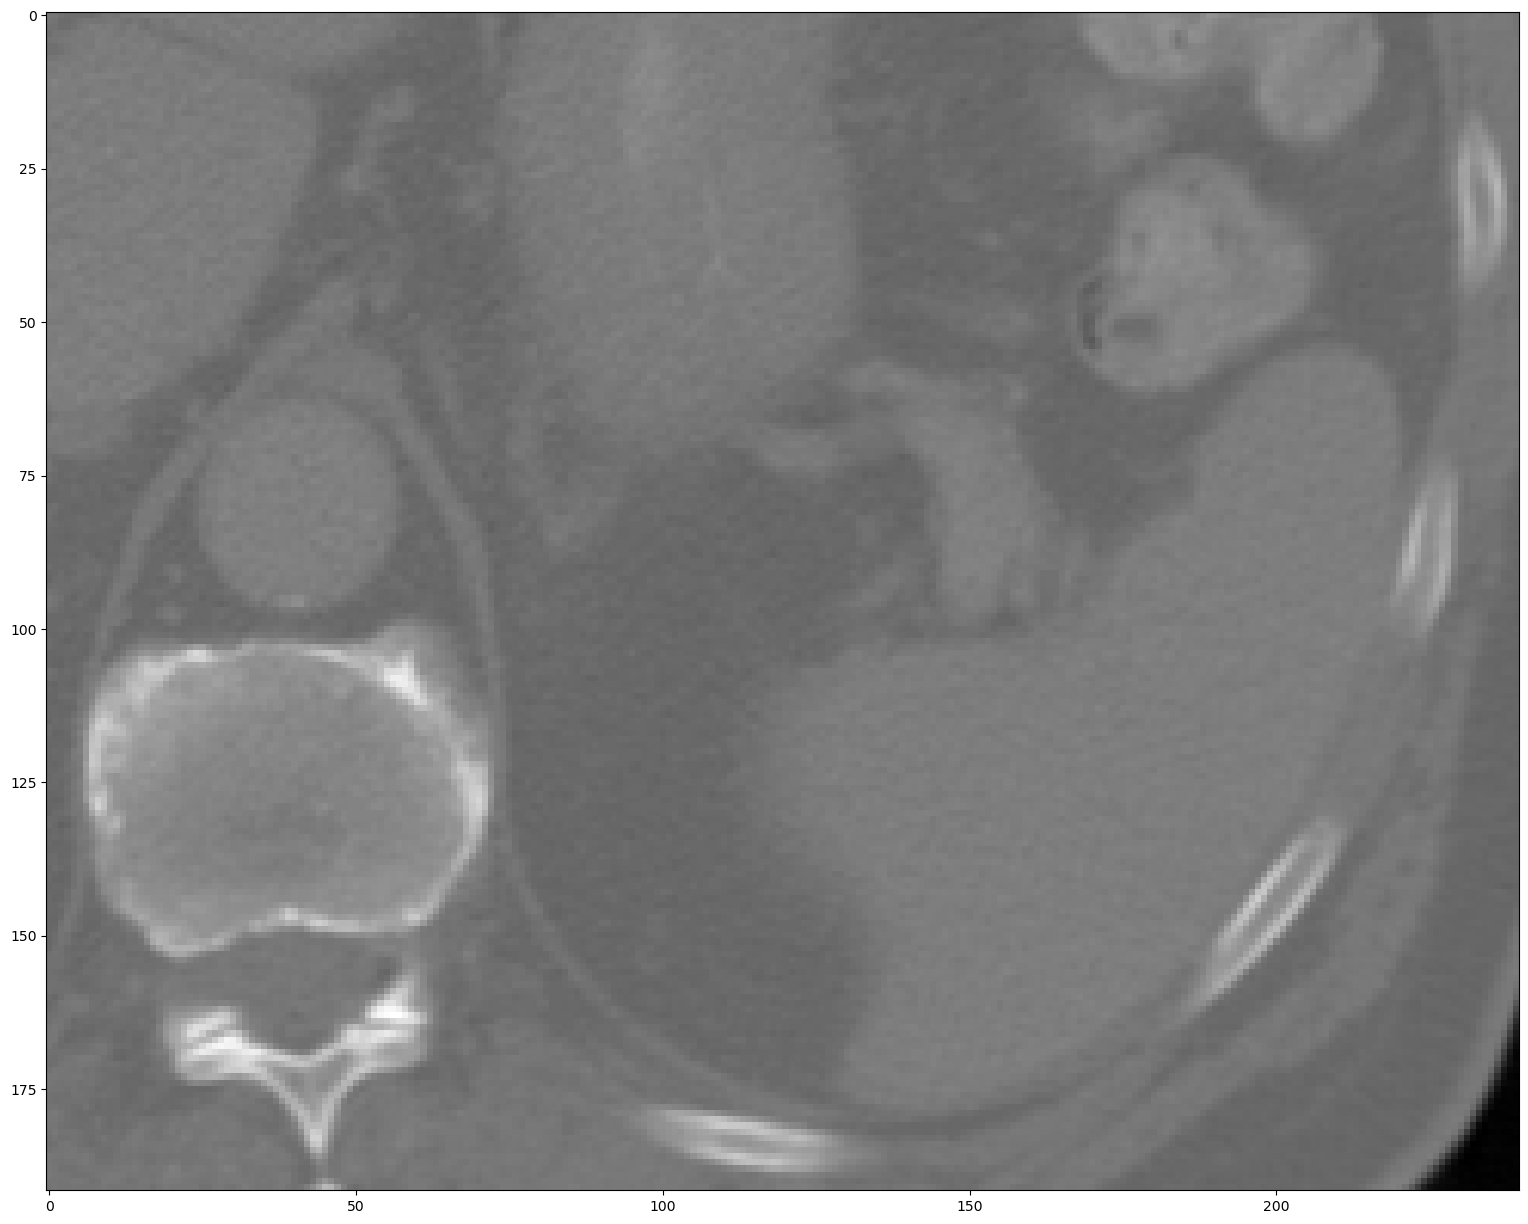

In [27]:
plt.set_cmap("gray")
plt.figure(figsize = (19,19))
plt.imshow(arr)
plt.show()

<Figure size 640x480 with 0 Axes>

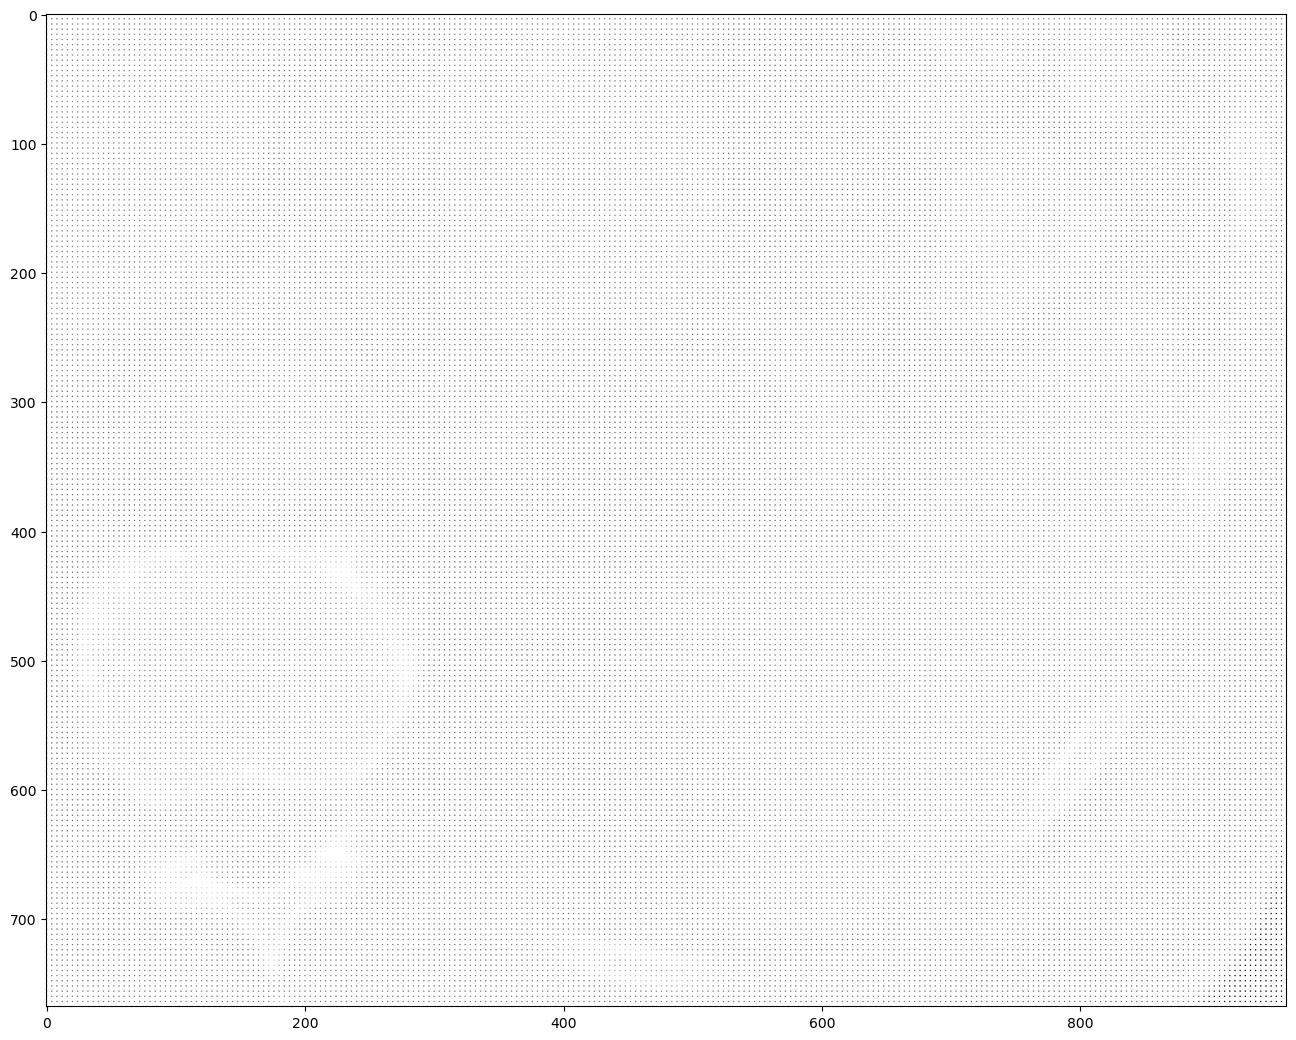

In [28]:

to_disp=einops.rearrange([arr,np.ones_like(arr)],'f w h -> (w f) h' )
to_disp=einops.rearrange([to_disp,np.ones_like(to_disp)],'f w h -> w (h f)' )
to_disp=einops.rearrange([to_disp,np.ones_like(to_disp)],'f w h -> (w f) h')
to_disp=einops.rearrange([to_disp,np.ones_like(to_disp)],'f w h -> w (h f)' )

plt.set_cmap("gray")
plt.figure(figsize = (16,16))
plt.imshow(to_disp)
plt.show()

<Figure size 640x480 with 0 Axes>

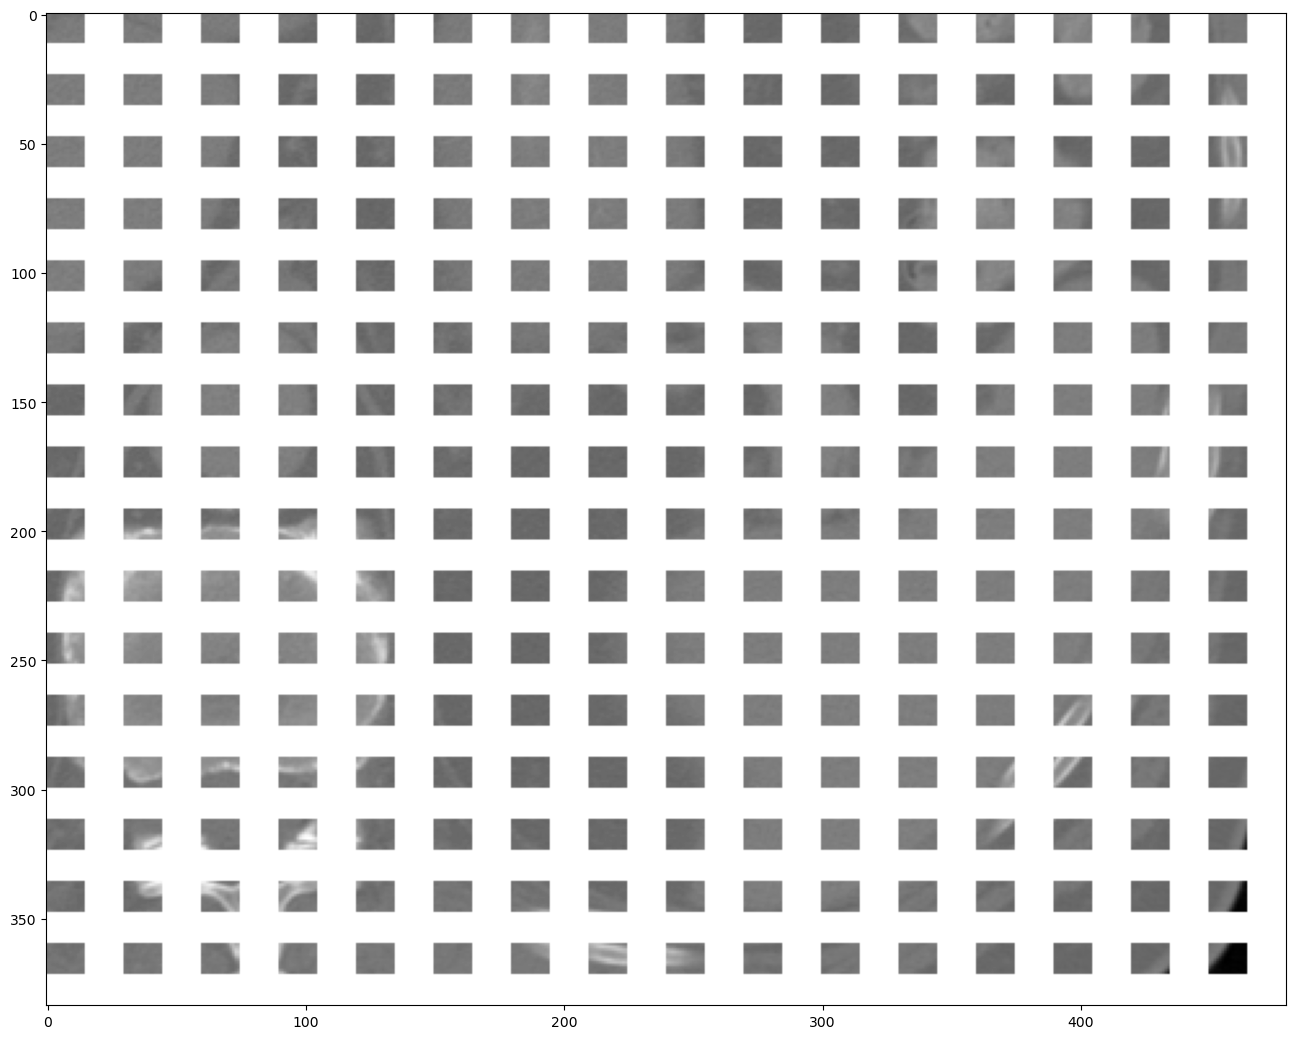

In [29]:
arr_curr=arr
arr_curr=einops.rearrange(arr_curr,'(a w) h->a w h',a=16)
arr_curr=einops.rearrange([arr_curr,np.ones_like(arr_curr)],'f a w h -> (a f w) h' )

arr_curr=einops.rearrange(arr_curr,'w (a h)->w a h',a=16)
arr_curr=einops.rearrange([arr_curr,np.ones_like(arr_curr)],'f w a h -> w (a f h)' )


plt.set_cmap("gray")
plt.figure(figsize = (16,16))
plt.imshow(arr_curr)
plt.show()



In [30]:
numSegments=110
# arr_now=einops.rearrange(arr,'w h -> w h 1')
segments = slic(arr_now, n_segments = numSegments, sigma = 0,max_num_iter=1000,channel_axis=None)
print(f"segments {segments.shape} arr_now {arr_now.shape}")
# plt.set_cmap("gray")
plt.figure(figsize = (16,16))
plt.imshow(mark_boundaries(arr_now[:,:,0], segments))
plt.axis("off")

plt.show()

segments (192, 240, 1) arr_now (192, 240, 1)


IndexError: boolean index did not match indexed array along dimension 2; dimension is 3 but corresponding boolean dimension is 1

<Figure size 1600x1600 with 0 Axes>

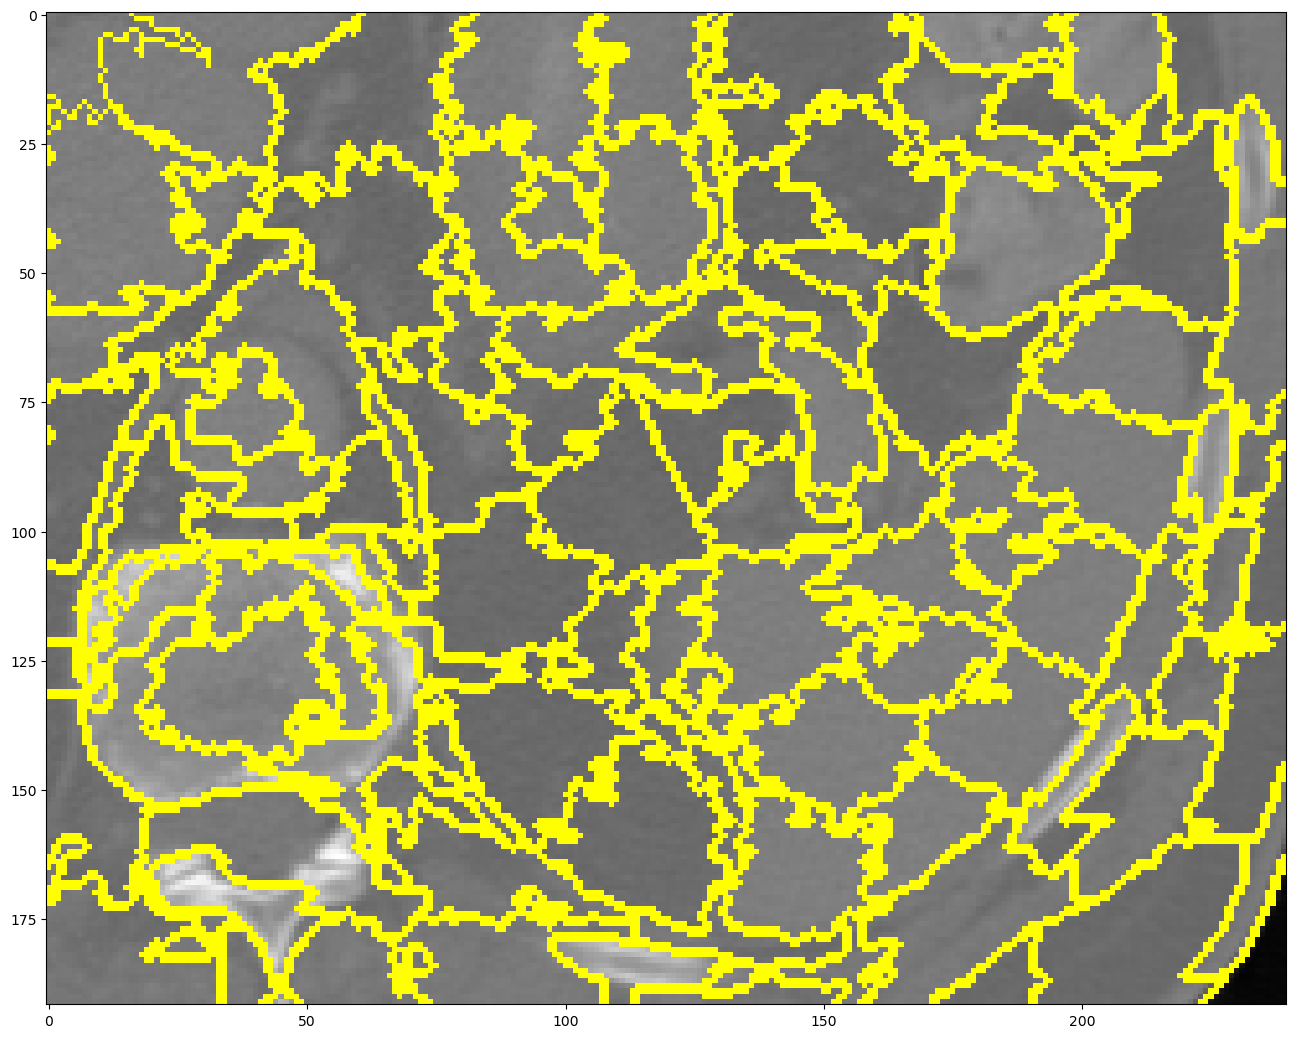

In [36]:
arr_sitk=arr
slic = sitk.SLICImageFilter()
# slic.SetMaximumNumberOfIterations(300)
slic.SetEnforceConnectivity(True)
slic.SetSuperGridSize((20,20))

image_sitk_nda=arr_sitk#einops.rearrange(arr_sitk,'w h -> (bb cc c) b a')
image_sitk = sitk.GetImageFromArray(image_sitk_nda)
image_sitk.SetSpacing((1.0,1.0))

rescalFilt=sitk.RescaleIntensityImageFilter()
rescalFilt.SetOutputMaximum(1000)
rescalFilt.SetOutputMinimum(0)
image_sitk=rescalFilt.Execute(image_sitk)

image_sitk=sitk.Cast(image_sitk, sitk.sitkInt64)
slic_seg = slic.Execute(image_sitk)
nda = sitk.GetArrayFromImage(slic_seg)
plt.figure(figsize = (16,16))

plt.imshow(mark_boundaries(arr_sitk, nda))
plt.show()
# nda=einops.rearrange(nda,'a b c -> 1 c b a')